In [57]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import logging
logging.getLogger('lightgbm').setLevel(logging.INFO)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

In [58]:
df = pd.read_csv(Path('winequality-red.csv'))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [59]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA - Exploratory Data Analysis

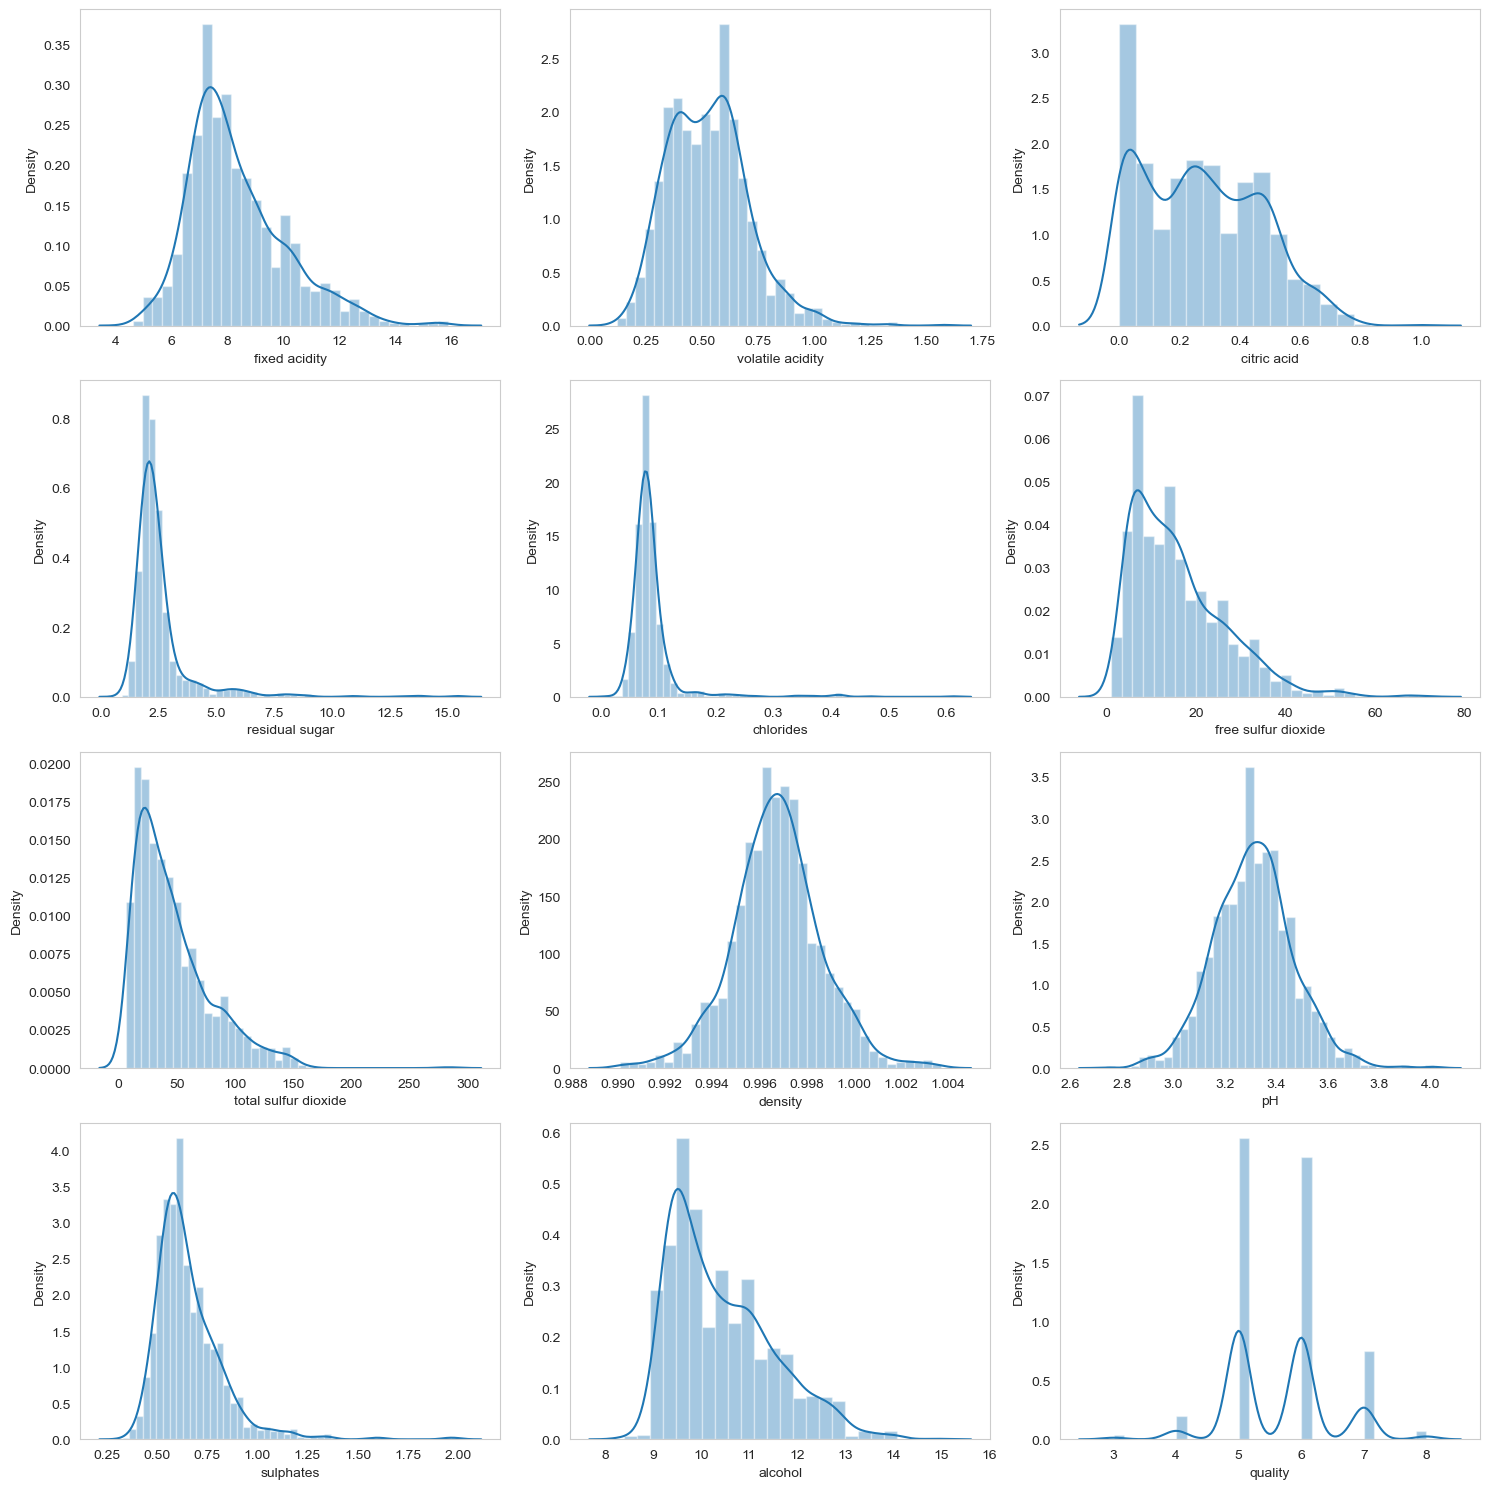

In [61]:
## Picturesque of columns
plt.figure(figsize=(15,15))
plotfig=1

for col in df:
    if plotfig<=12:
        ax=plt.subplot(4, 3, plotfig)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=10)
        
    plotfig+=1
    
plt.tight_layout()
plt.show()

<Axes: >

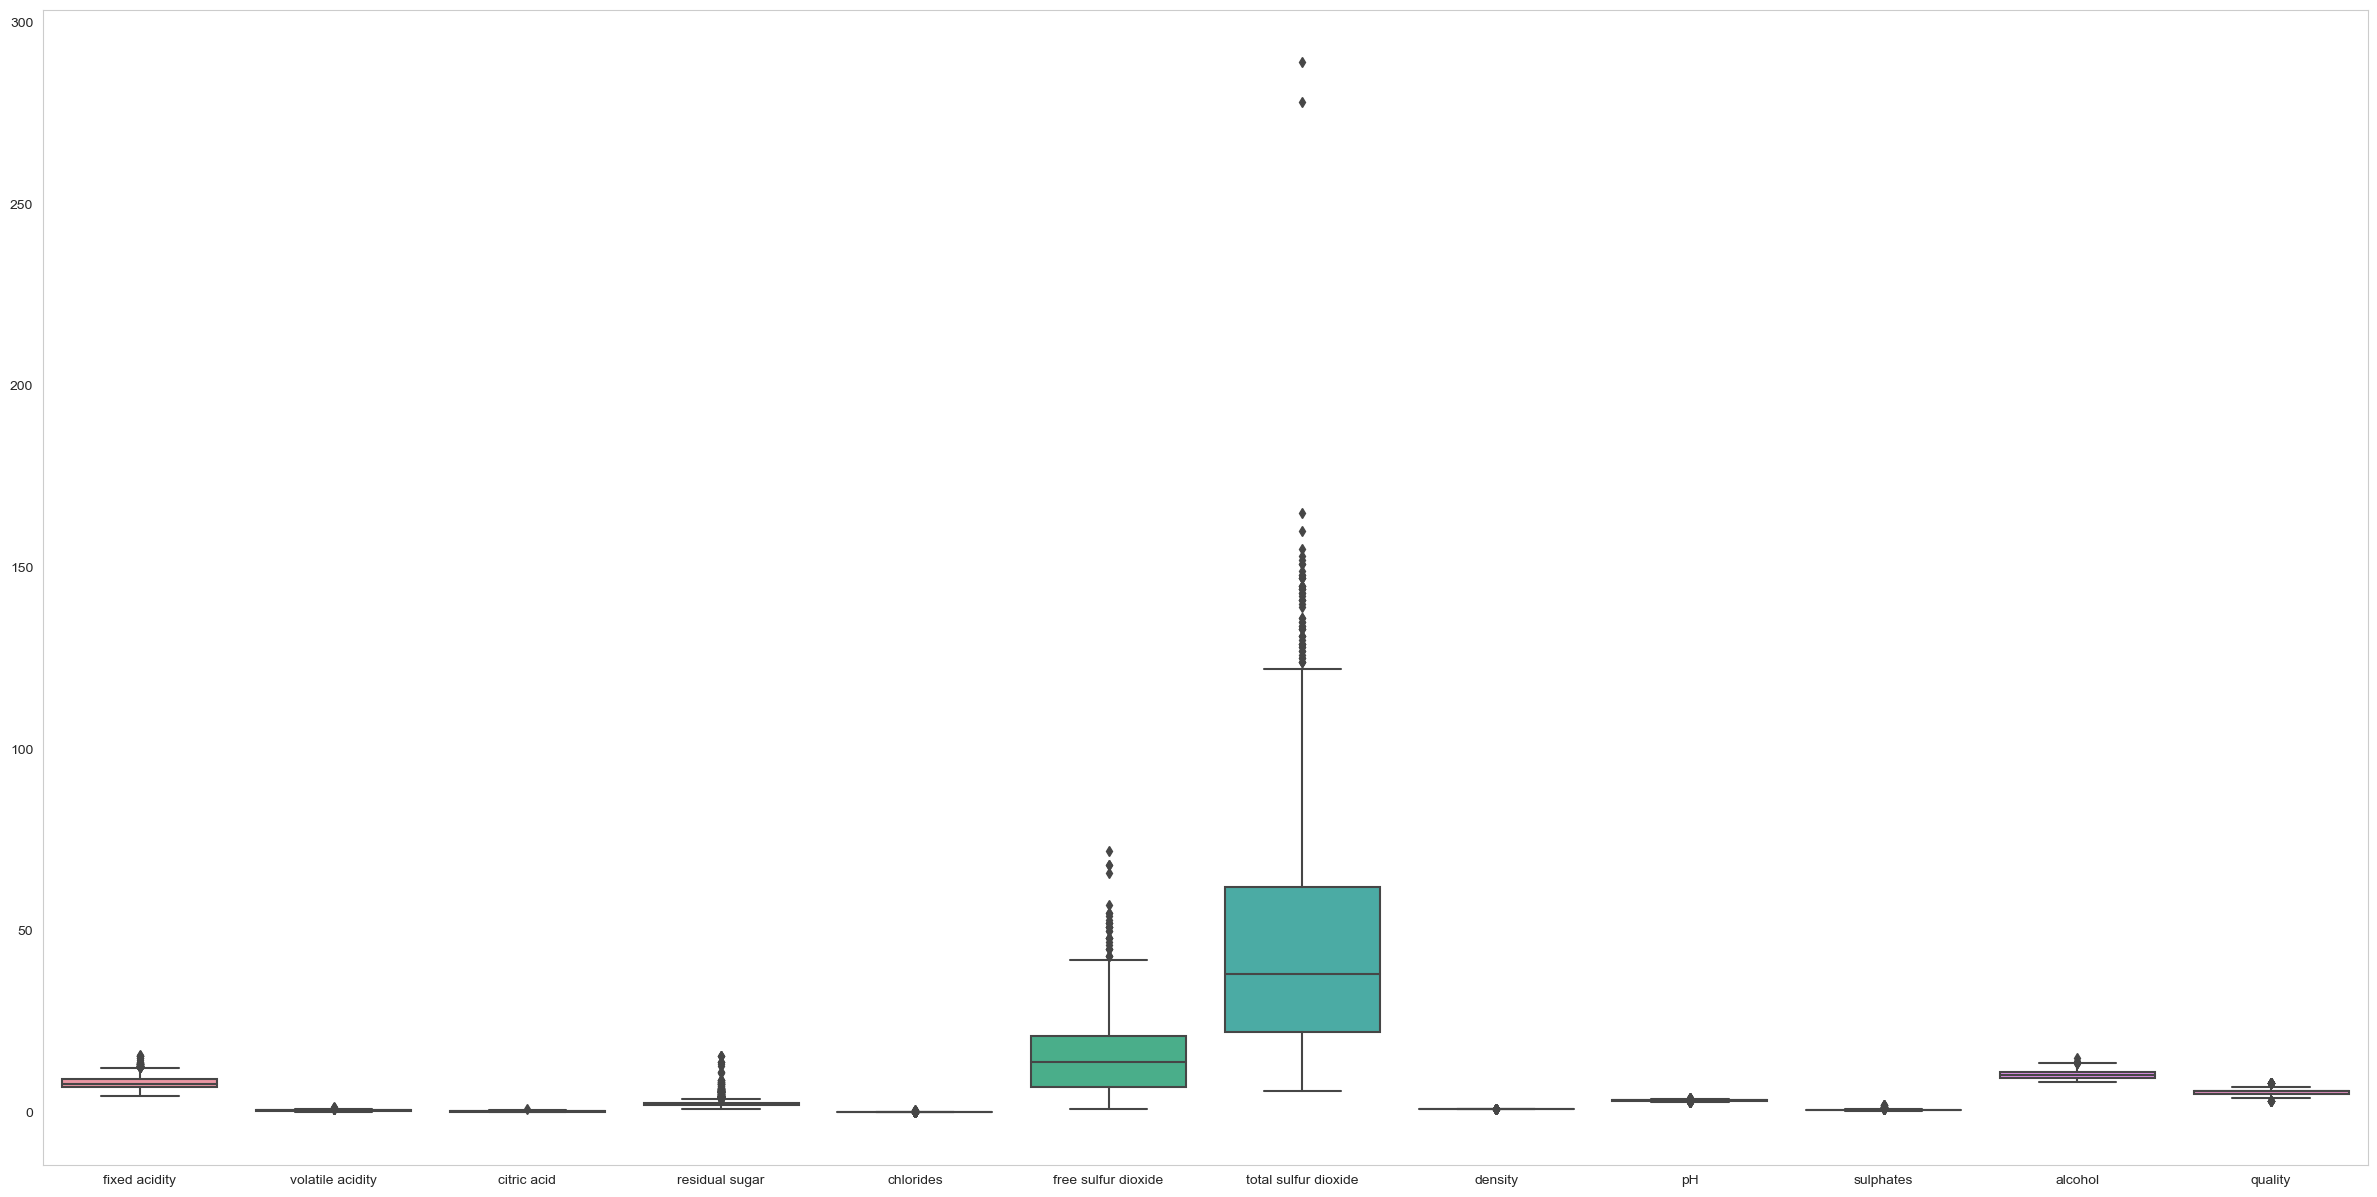

In [62]:
# boxplot for each columns
plt.figure(figsize=(30, 15))
sns.boxplot(data=df)

<Axes: >

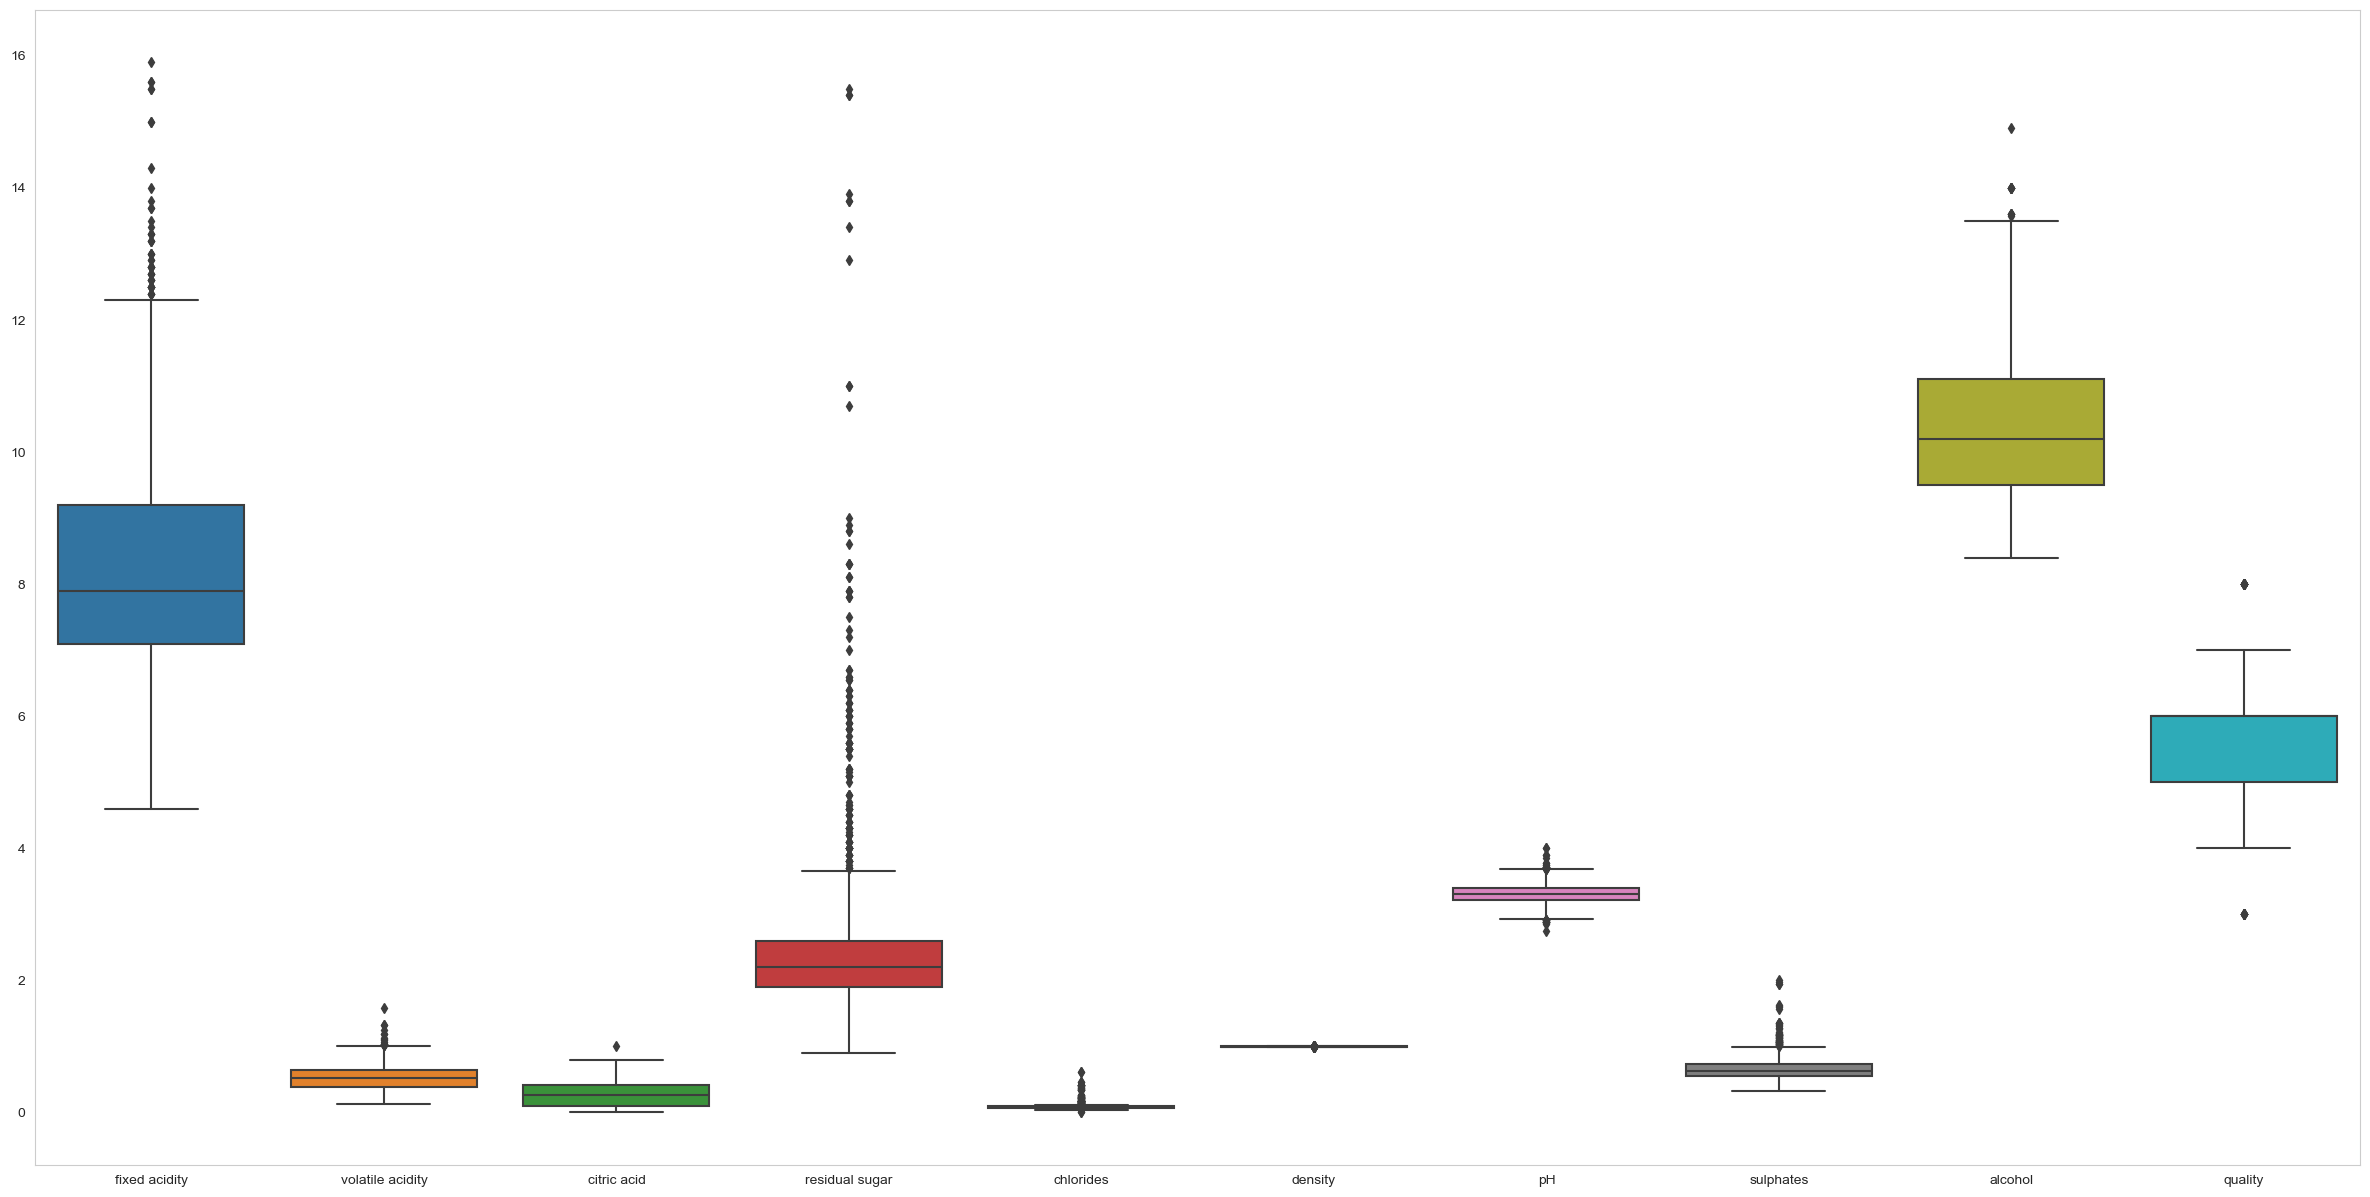

In [63]:
# zoom out some variables
plt.figure(figsize=(30, 15))
zoom = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]
sns.boxplot(data=zoom)

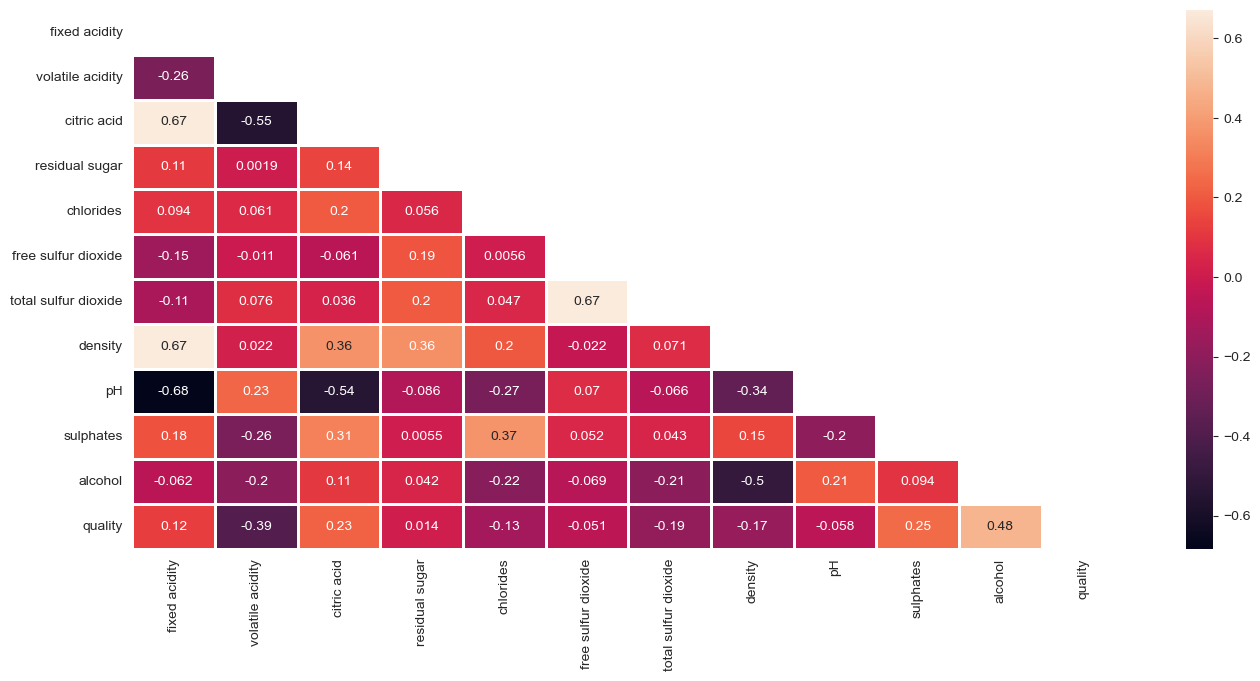

In [64]:
# Heatmap 
plt.figure(figsize=(16,7))

correlation=df.corr()
mask=np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask ,annot=True, fmt='0.2g', linewidth=1)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.show()

In [65]:
## features(X values)
X = df.drop('quality', axis=1)

In [66]:
## target(y)
y = df.iloc[:, -1]

In [67]:
# split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [68]:
# View Shape of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [69]:
# scale data
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
X_train_scaled = model.fit_transform(X_train)
X_test_scaled = model.transform(X_test)

# Implementing Machine Learning Models

In [70]:
# Instantiate Logistic regression
model = LogisticRegression(multi_class='multinomial')

In [71]:
# fit data
lr_model = model.fit(X_train_scaled, y_train)

In [72]:
# Make a prediction using the testing data
pred = model.predict(X_test_scaled)

pd.DataFrame(
    {
        'Prediction' : pred,
        'Actual': y_test
    }
)

,Prediction,Actual
1284,6,5
1549,6,8
1551,5,5
1242,6,6
1482,5,4
...,...,...
716,5,5
789,5,5
223,5,6
142,7,6


# Logistic Reg Performance Metrics

In [73]:
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr_acc_score = accuracy_score(y_test, pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, model.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {lr_acc_score}')

Training Accuracy Score: 0.6105087572977481
Testing Accuracy Score: 0.58


In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00        13
           5       0.63      0.72      0.67       170
           6       0.54      0.56      0.55       160
           7       0.49      0.36      0.41        50
           8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.44      0.36      0.38       400
weighted avg       0.55      0.58      0.56       400



# KNeighborsClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [76]:
knn_pred = model.predict(X_test_scaled)

In [77]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, knn.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {knn_acc_score}')

Training Accuracy Score: 0.6914095079232694
Testing Accuracy Score: 0.58


In [78]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00        13
           5       0.63      0.72      0.67       170
           6       0.54      0.56      0.55       160
           7       0.49      0.36      0.41        50
           8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.44      0.36      0.38       400
weighted avg       0.55      0.58      0.56       400



# Support Vector Classification

In [79]:
# SVC
from sklearn.svm import SVC
mod = SVC()
svc_model = mod.fit(X_train_scaled, y_train)
svc_pred = mod.predict(X_test_scaled)

In [80]:
svc_acc_score = accuracy_score(y_test, svc_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train, mod.predict(X_train_scaled))}')
print(f'Testing Accuracy Score: {svc_acc_score}')

Training Accuracy Score: 0.6855713094245204
Testing Accuracy Score: 0.62


In [81]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.67      0.76      0.71       170
           6       0.57      0.64      0.61       160
           7       0.57      0.32      0.41        50
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.30      0.29      0.29       400
weighted avg       0.59      0.62      0.60       400



# Stochastic Gradient Descent

In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
sgd = SGDClassifier()
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1],
    'loss' : ['hinge', 'log'],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(sgd, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'log'], 'penalty': ['l1', 'l2']})

In [83]:
# best parameter and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.5587815126050419


In [84]:
sgd = SGDClassifier(alpha = 0.1, loss = 'log_loss', penalty = 'l2')
modd = sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)

print(f'Training Accuracy Score: {accuracy_score(y_train, sgd.predict(X_train_scaled))}')

sgd_acc_score = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy Score: {sgd_acc_score}')

Training Accuracy Score: 0.5804837364470392
Testing Accuracy Score: 0.565


In [85]:
# Calssification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.61      0.78      0.68       170
           6       0.51      0.59      0.55       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.19      0.23      0.21       400
weighted avg       0.46      0.56      0.51       400



# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
moddtc = dtc.fit(X_train_scaled, y_train)

In [87]:
# accuracy score
predtc = moddtc.predict(X_test_scaled)
dtc_acc_score = accuracy_score(y_test, predtc)
print(f"Training Accuracy Score: {accuracy_score(y_train, dtc.predict(X_train_scaled))}")
print(f"Testing Accuracy Score:{dtc_acc_score}")

Training Accuracy Score: 1.0
Testing Accuracy Score:0.63


In [88]:
# Calssification Report
print(classification_report(y_test, predtc))

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.17      0.15      0.16        13
           5       0.69      0.73      0.71       170
           6       0.64      0.63      0.64       160
           7       0.55      0.46      0.50        50
           8       0.17      0.20      0.18         5

    accuracy                           0.63       400
   macro avg       0.42      0.45      0.43       400
weighted avg       0.63      0.63      0.63       400



# RandomForest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [90]:
rf_pred = rf.predict(X_test_scaled)
rf_acc_score = accuracy_score(y_test, rf_pred)
print(f"Training Accuracy Score: {accuracy_score(y_train, rf.predict(X_train_scaled))}")
print(f"Testing Accuracy Score: {rf_acc_score}")

Training Accuracy Score: 1.0
Testing Accuracy Score: 0.705


In [91]:
# Calssification Report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.76      0.80      0.78       170
           6       0.66      0.73      0.70       160
           7       0.68      0.56      0.62        50
           8       0.50      0.20      0.29         5

    accuracy                           0.70       400
   macro avg       0.43      0.38      0.40       400
weighted avg       0.68      0.70      0.69       400



Text(0.5, 1.0, 'Feature Importances')

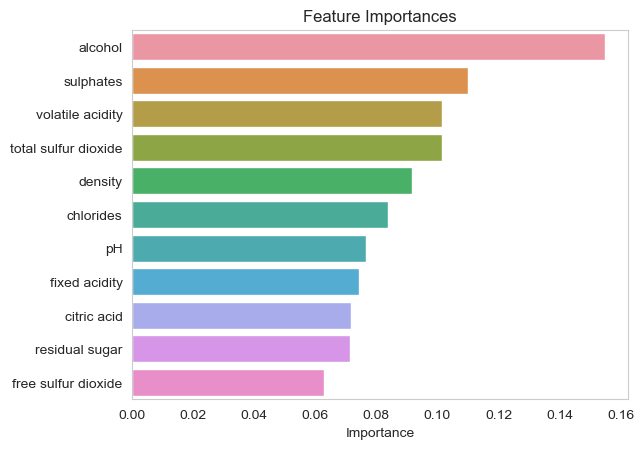

In [92]:
# Calculate the feature importances
important_features = rf.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

# Gradient Boosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [94]:
# print accuracy score
gb_pred = gb.predict(X_test_scaled)
gb_acc_score = accuracy_score(y_test, gb_pred)
print(f"Training Accuracy Score: {accuracy_score(y_train, gb.predict(X_train_scaled))}")
print(f'Testing Accuracy Score: {gb_acc_score}')

Training Accuracy Score: 0.8924103419516264
Testing Accuracy Score: 0.655


In [95]:
# Calssification Report
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.08      0.10        13
           5       0.72      0.76      0.74       170
           6       0.62      0.68      0.65       160
           7       0.64      0.46      0.53        50
           8       0.50      0.20      0.29         5

    accuracy                           0.66       400
   macro avg       0.43      0.36      0.38       400
weighted avg       0.64      0.66      0.65       400



Text(0.5, 1.0, 'Feature Importances')

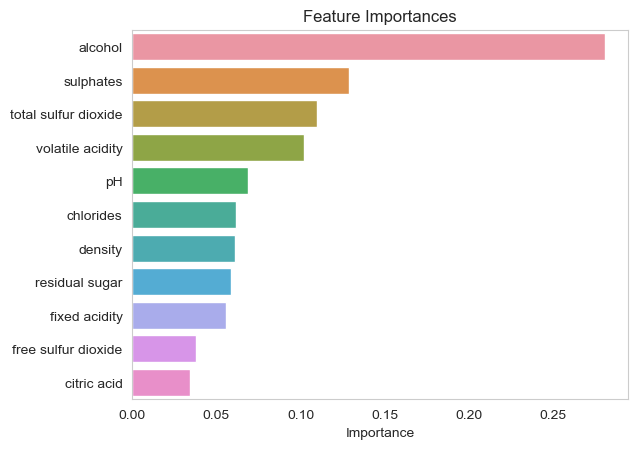

In [96]:
# Calculate the feature importances
important_features = gb.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

# Light Gradient Boosting Machine Classifier

In [97]:
# Model. Fit. Predict
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
lgbm_predt = lgbm.predict(X_train_scaled)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_acc_score = accuracy_score(y_test, lgbm_pred)
print(f'Training Accuracy Score: {accuracy_score(y_train,lgbm_predt)}')
print(f'Testing Accuracy Score: {lgbm_acc_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1015
[LightGBM] [Info] Number of data points in the train set: 1199, number of used features: 11
[LightGBM] [Info] Start training from score -5.009802
[LightGBM] [Info] Start training from score -3.400364
[LightGBM] [Info] Start training from score -0.852874
[LightGBM] [Info] Start training from score -0.919632
[LightGBM] [Info] Start training from score -2.085297
[LightGBM] [Info] Start training from score -4.524294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [98]:
# Calssification Report
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.08      0.13        13
           5       0.74      0.80      0.77       170
           6       0.65      0.69      0.67       160
           7       0.62      0.56      0.59        50
           8       1.00      0.20      0.33         5

    accuracy                           0.69       400
   macro avg       0.59      0.39      0.42       400
weighted avg       0.68      0.69      0.68       400



# CatBoost Classifier

In [99]:
# Model. Fit. Predict
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train_scaled, y_train)
cat_predt = lgbm.predict(X_train_scaled)
cat_pred = lgbm.predict(X_test_scaled)
cat_acc_score = accuracy_score(y_test, cat_pred)
print(f'Testing Accuracy Score: {cat_acc_score}')

Learning rate set to 0.079863
0:	learn: 1.6785692	total: 8.37ms	remaining: 8.36s
1:	learn: 1.5967681	total: 15.1ms	remaining: 7.54s
2:	learn: 1.5189864	total: 21.3ms	remaining: 7.09s
3:	learn: 1.4505777	total: 28.3ms	remaining: 7.04s
4:	learn: 1.3970162	total: 34.8ms	remaining: 6.93s
5:	learn: 1.3498024	total: 40.9ms	remaining: 6.78s
6:	learn: 1.3079267	total: 47ms	remaining: 6.66s
7:	learn: 1.2699589	total: 53.2ms	remaining: 6.59s
8:	learn: 1.2357982	total: 59.5ms	remaining: 6.55s
9:	learn: 1.2042968	total: 66ms	remaining: 6.53s
10:	learn: 1.1763281	total: 72ms	remaining: 6.47s
11:	learn: 1.1500126	total: 78.2ms	remaining: 6.44s
12:	learn: 1.1270361	total: 85ms	remaining: 6.46s
13:	learn: 1.1049163	total: 92ms	remaining: 6.48s
14:	learn: 1.0860792	total: 98.3ms	remaining: 6.45s
15:	learn: 1.0676117	total: 105ms	remaining: 6.46s
16:	learn: 1.0509286	total: 112ms	remaining: 6.46s
17:	learn: 1.0348637	total: 118ms	remaining: 6.46s
18:	learn: 1.0200565	total: 141ms	remaining: 7.26s
19:	le

In [100]:
# Calssification Report
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.08      0.13        13
           5       0.74      0.80      0.77       170
           6       0.65      0.69      0.67       160
           7       0.62      0.56      0.59        50
           8       1.00      0.20      0.33         5

    accuracy                           0.69       400
   macro avg       0.59      0.39      0.42       400
weighted avg       0.68      0.69      0.68       400



# XGBoost Classifier

In [101]:
# Import xgboost
import xgboost as xgb

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [103]:
# Use XgboostClassifier to fit model
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

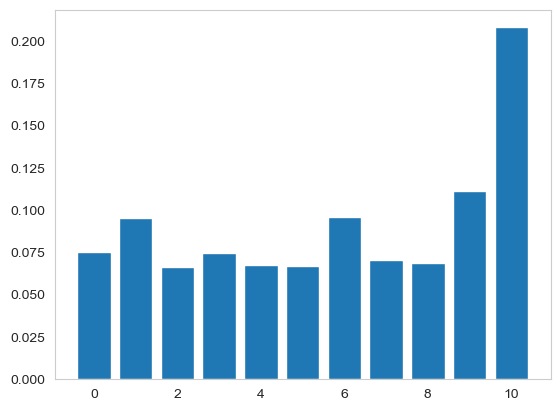

In [104]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [105]:
xgb_pred = model.predict(X_test_scaled)
xgb_acc_score = accuracy_score(y_test, xgb_pred)
print(f"Testing Accuracy Score: {xgb_acc_score}")

Testing Accuracy Score: 0.0025


In [106]:
# Calssification Report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      0.50      0.01         2
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00       170
           6       0.00      0.00      0.00       160
           7       0.00      0.00      0.00        50
           8       0.00      0.00      0.00         5

    accuracy                           0.00       400
   macro avg       0.00      0.06      0.00       400
weighted avg       0.00      0.00      0.00       400



# Multi-Layer Preceptron Classification

In [107]:
# Import a new classifier from SKLearn, Multi-Layer Preceptron Classifier
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
model = MLPClassifier(
    solver='sgd',
    alpha=1e-5,
    max_iter=1200,
    hidden_layer_sizes=(100, 60, 40)
)

In [108]:
# Fit the model using the training data
model = model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = model.predict(X_test_scaled)

# Review the model's predicted values
pred[:10]

array([3, 4, 2, 3, 2, 3, 3, 3, 3, 3], dtype=int64)

In [109]:
mlpc_acc_score = accuracy_score(y_test, pred)
print(f'Testing Accuracy Score: {mlpc_acc_score}')

Testing Accuracy Score: 0.0


In [110]:
# Calssification Report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00      13.0
           5       0.00      0.00      0.00     170.0
           6       0.00      0.00      0.00     160.0
           7       0.00      0.00      0.00      50.0
           8       0.00      0.00      0.00       5.0

    accuracy                           0.00     400.0
   macro avg       0.00      0.00      0.00     400.0
weighted avg       0.00      0.00      0.00     400.0



In [111]:
# models in dataframe
models = pd.DataFrame(
    {
        'Model' : ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'LGBM', 'Cat Boost', 'MLPClassifier'],
        'Score': [lr_acc_score, knn_acc_score, svc_acc_score, dtc_acc_score, rf_acc_score, gb_acc_score, lgbm_acc_score, cat_acc_score, mlpc_acc_score]
    }
)
models.sort_values(by = 'Score', ascending= False)

,Model,Score
4,Random Forest,0.705
6,LGBM,0.690
7,Cat Boost,0.690
5,Gradient Boosting,0.655
3,Decision Tree,0.630
2,SVC,0.620
0,Logistic Regression,0.580
1,KNN,0.580
8,MLPClassifier,0.000


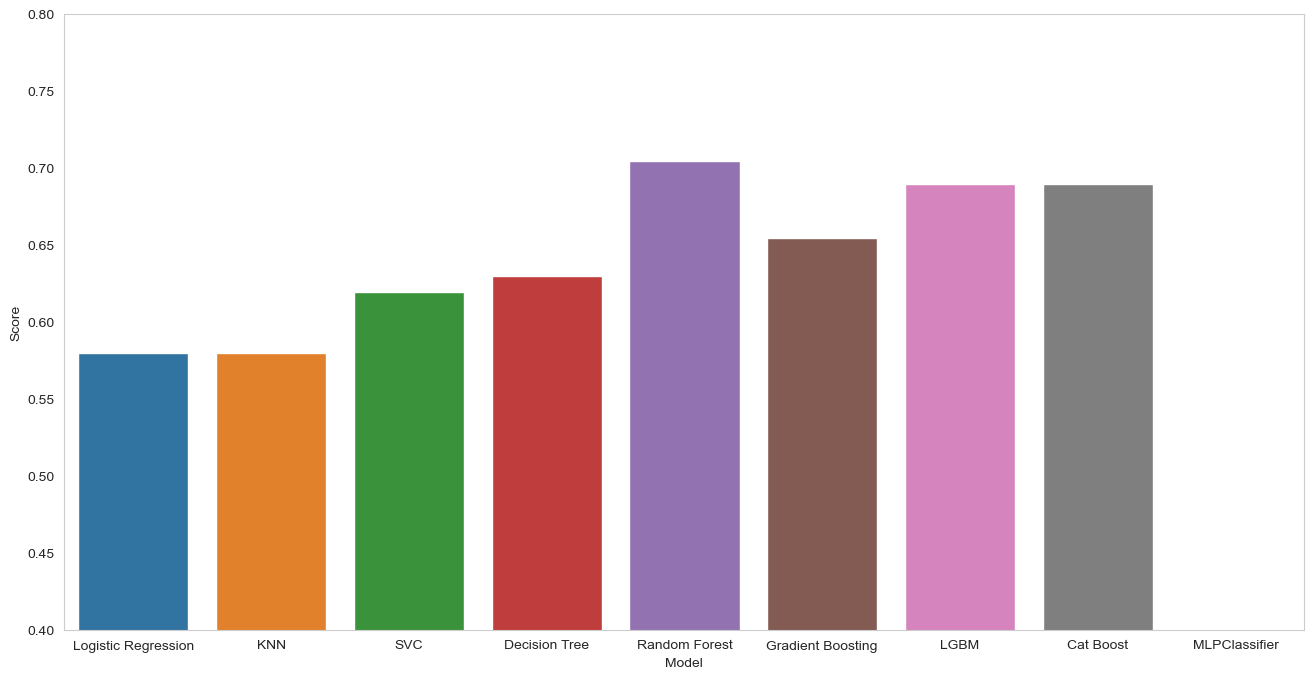

In [112]:
plt.figure(figsize = (16, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.40, 0.80)
plt.show()

In [113]:
import pickle

In [114]:
filename = 'rwine_quality.sav'
pickle.dump(lr_model, open(filename, 'wb'))